In [10]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np 
import matplotlib.pyplot as plt 

In [2]:
# Load and preprocess data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [3]:
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [4]:
# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    
    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])


C:\Users\Sandarya\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train
model.fit(X_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

# Evaluate
test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 89s 100ms/step - accuracy: 0.8885 - loss: 0.3822 - val_accuracy: 0.9827 - val_loss: 0.0625
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 108s 128ms/step - accuracy: 0.9824 - loss: 0.0547 - val_accuracy: 0.9873 - val_loss: 0.0445
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 75s 88ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9882 - val_loss: 0.0414
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 90s 106ms/step - accuracy: 0.9926 - loss: 0.0252 - val_accuracy: 0.9890 - val_loss: 0.0405
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 166s 134ms/step - accuracy: 0.9939 - loss: 0.0184 - val_accuracy: 0.9902 - val_loss: 0.0340
Test Accuracy: 0.9903


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step


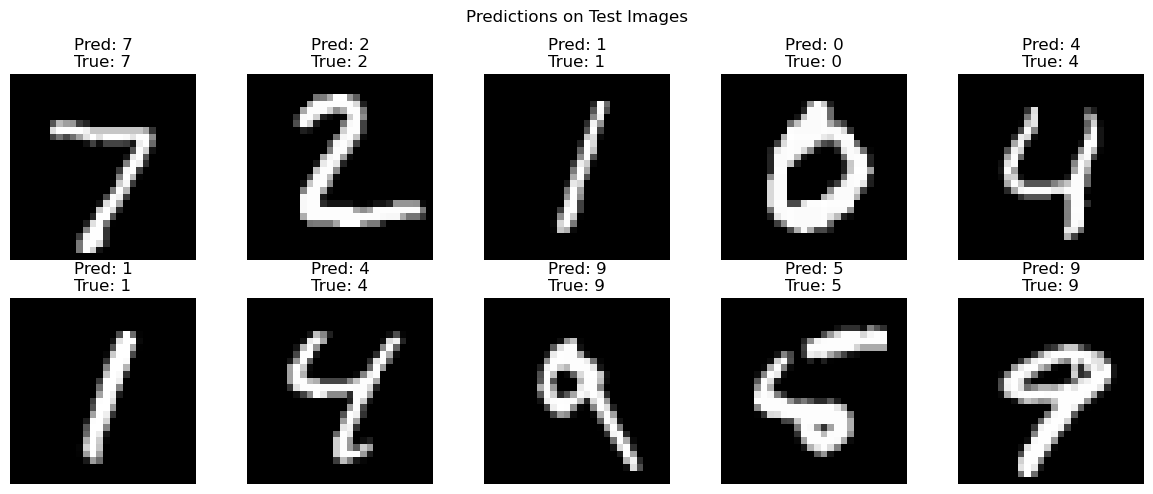

In [11]:
# ---- Image Visualization with Predictions ----
# Predict on test set
predictions = model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)

# Plot 10 test images with predicted and actual labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nTrue: {y_test[i]}")
    plt.axis('off')

plt.suptitle("Predictions on Test Images")
plt.tight_layout()
plt.show()